## Question 1

Partial derivative $\frac{\partial J(\vect{x})}{\partial w_{j,i}^{(1)}}$ of the cost function $J(\vect{x})$ with respect to weight $w_{j,i}^{(1)}$ between input $\vect{x_{i}}$ and the hidden unit $h_{j}^{1}$ for a 2 hidden layer (k=2) neural network with sigmoid activation functions. 


$\newcommand{\vect}[1]{\boldsymbol{#1}} $

\begin{equation}
\begin{split}
\frac{\partial J(\vect{x})}{\partial w_{j,i}^{(1)}} & = \frac{\partial (f(\vect{x})-y)^2}{\partial w_{j,i}^{(1)}}\\
& = 2(f(\vect{x})-y) \frac{\partial f(\vect{x})}{\partial w_{j,i}^{(1)}} \\ 
& = 2(f(\vect{x})-y)f(\vect{x})(1-(f(\vect{x}))) \frac{\partial \sum_{l=1}^{L} w_{l}h_{l}^{(2)} + b}{\partial w_{j,i}^{(1)}}\\
& = 2(f(\vect{x})-y)f(\vect{x})(1-(f(\vect{x})))w_{i}\frac{\partial h_{i}^{(2)}}{\partial w_{j,i}^{(1)}}\\
& = 2(f(\vect{x})-y)f(\vect{x})(1-(f(\vect{x})))w_{i}h_{i}^{(2)}(1-h_{i}^{(2)}) \frac{\partial \sum_{m=1}^{M} w_{k,i}^{(2)}h_{k}^{(1)} + b_{i}^{(2)}}{\partial w_{j,i}^{(1)}}\\
& = 2(f(\vect{x})-y)f(\vect{x})(1-(f(\vect{x})))w_{i}h_{i}^{(2)}(1-h_{i}^{(2)})w_{j,i}^{(2)} \frac{\partial h_{i}^{(i)}}{\partial w_{j,i}^{(1)}} \\
& = 2(f(\vect{x})-y)f(\vect{x})(1-(f(\vect{x})))w_{i}h_{i}^{(2)}(1-h_{i}^{(2)})w_{j,i}^{(2)}h_{i}^{(1)}(1-h_{i}^{(1)})\frac{\partial \sum_{n=1}^{N} w_{n,i}^{(1)}\vect{x_{k}} + b_{i}^{(1)}}{\partial w_{j,i}^{(1)}}\\
& = 2(f(\vect{x})-y)f(\vect{x})(1-(f(\vect{x})))w_{i}h_{i}^{(2)}(1-h_{i}^{(2)})w_{j,i}^{(2)}h_{i}^{(1)}(1-h_{i}^{(1)})\vect{x_{j}}
\end{split}
\end{equation}


* Line 1 by definition of $J(\vect{x})$
* Line 2 derivative of a polynomial and chain rule
* Line 3 derivative of sigmoid function and chain rule applied to activation funtion on output layer
* Line 4 derivative of hidden layer 2
* Line 5 derivative of sigmoid and second hidden layer
* Line 6 derivative of hidden layer 1
* Line 7 derivative of sigmoid and first hidden layer
* Line 8 



## Question 2

In [1]:
# Hannah LeBlanc (10091837) CISC873 Deep Learning
import numpy as np
from random import randint
import matplotlib.pyplot as plt

In [2]:
# k=1 hidden layer neural network
class Network:
    def __init__(self, alpha, inputUnits, hiddenUnits):
        #setting seed so that initalized weights are consistent
        np.random.seed(3)
        # np.zeros and np.random.randn both return type ndarray
        self.W1 = np.random.rand(inputUnits,hiddenUnits)
        self.b1 = np.zeros((1,hiddenUnits))
        self.W =  np.random.randn(hiddenUnits,1)
        self.b = np.zeros((1, 1))
        # learning rate
        self.alpha = alpha
        self.printParams()
        
    # activation function    
    def sigmoid(self,x):
        return 1.0/(1.0 + np.exp(-x))
    
    # activation function derivative
    def sigmoidDerivative(self, x):
        return x * (1.0 - x)
        
    # M x N array = X, (4x2)
    # M dim array = y, (4x1)
    def train(self, X, y):
        self.forwardPropagation(X)
        error = np.absolute(self.output-y)
        self.backPropagation(X,y)
        return error
    
    # M x N array = X, (4x2)
    # output is a 4 x 1 ndarray
    # uses sigmoid as activation function
    def forwardPropagation(self, x):
        self.z1 = np.dot(x,self.W1) + self.b1
        self.hidden = self.sigmoid(self.z1)
        self.z2 = np.dot(self.hidden,self.W) + self.b
        self.output = self.sigmoid(self.z2) # Final output prediction
    
    # x = 4 x 2
    # y = 4 x 1
    def backPropagation(self,x,y):
        h = self.hidden # 4 x 2
        fx = self.output # 4 x 1
    
        #weight partial derivs
        self.dW = np.dot(h.T, (2*(y - fx) * self.sigmoidDerivative(fx)))
        self.dW1 = np.dot(x.T,  (np.dot(2*(y - fx) * self.sigmoidDerivative(fx), self.W.T) * self.sigmoidDerivative(h)))
        
        #bias partial derivs
        db =  (2*(y - fx) * self.sigmoidDerivative(fx))
        db1 = (np.dot(2*(y - fx) * self.sigmoidDerivative(fx), self.W.T) * self.sigmoidDerivative(h))
        
        # update weights with gradient 
        self.W1 = self.W1 + self.alpha * self.dW1 # 2 x 2 
        self.b1 = self.b1 + self.alpha * db1 # 1 x 2
        self.W = self.W + self.alpha * self.dW # 2 x 1
        self.b = self.b + self.alpha * db # 1 x 1
        
    def predict(self, X):
        self.forwardPropagation(X)
        return self.output

    def printParams(self):
        print("Learning Rate: ",self.alpha)
        print("W1: ", self.W1.shape)
        print(self.W1)
        print("b1: ", self.b1.shape)
        print(self.b1)
        print("W: ", self.W.shape)
        print(self.W)
        print("b: ", self.b.shape)
        print(self.b)
        
    def testNNClass(self):
        print(self.sigmoid(np.array([[0,0,0,0]]).T))
        print(self.sigmoid(np.array([[0,0,0,0]])))


Training neural network on XOR problem ($M = 4$ binary input patterns of length $N = 2$) until $|f(\vect x^{p}) - y^{p}| < 0.4$ for all p.

Currently $J(\vect x)$ is commented out because train runs for many iterations. Predicted patterns are printed along with actual labels. Ideally a step function should be used at the end so that the output prediction would match the same classes as labels. Using a learning rate of 0.001 and 2 units in hidden layer. 

In [3]:
# train and test values
X = np.array([[1,0],[0,0],[0,1],[1,1]]) # MxN = 4X2
y = np.array([[1,0,1,0]]).T

# error threshold 
error_t = 0.4
error = 1
hiddenNodes = 2
numIterations = 100000
i=0

# #alpha, input, hidden
q2 = Network(0.001,2,hiddenNodes)
# while less than max iterations and all training samples have an error greater than 0.4
while i < numIterations and np.greater(error,error_t).any():
    error = q2.train(X, y)
    #cost = np.sum(np.power(error,2),axis=0)
    #print(cost)
    i += 1

# confirming that the correct patterns are predicted for the four test cases    
print("Epochs: ",i)
print("Hidden layer size: ",hiddenNodes)
print()
print("PREDICTED")
print(q2.predict(X))
print("ACTUAL")
print(y)



Learning Rate:  0.001
W1:  (2, 2)
[[0.5507979  0.70814782]
 [0.29090474 0.51082761]]
b1:  (1, 2)
[[0. 0.]]
W:  (2, 1)
[[-0.2773882 ]
 [-0.35475898]]
b:  (1, 1)
[[0.]]
Epochs:  2397
Hidden layer size:  2

PREDICTED
[[0.60007699]
 [0.35825711]
 [0.60222078]
 [0.35053803]]
ACTUAL
[[1]
 [0]
 [1]
 [0]]


Learning Rate:  0.001
W1:  (2, 8)
[[0.5507979  0.70814782 0.29090474 0.51082761 0.89294695 0.89629309
  0.12558531 0.20724288]
 [0.0514672  0.44080984 0.02987621 0.45683322 0.64914405 0.27848728
  0.6762549  0.59086282]]
b1:  (1, 8)
[[0. 0. 0. 0. 0. 0. 0. 0.]]
W:  (8, 1)
[[ 0.05003364]
 [-0.40467741]
 [-0.54535995]
 [-1.54647732]
 [ 0.98236743]
 [-1.10106763]
 [-1.18504653]
 [-0.2056499 ]]
b:  (1, 1)
[[0.]]

PREDICTED
[[0.95571182]
 [0.03954387]
 [0.95592983]
 [0.04574543]]
ACTUAL
[[1]
 [0]
 [1]
 [0]]


Text(0,0.5,'Cost')

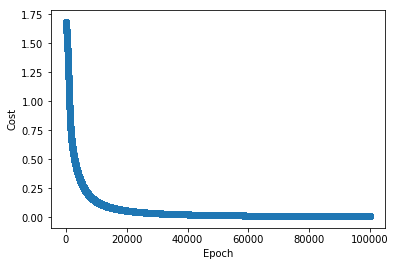

In [4]:
# holding cost for each iteration so that it can be plotted 
Jx = []

# error threshold 
error_t = 0.001
hiddenNodes = 8
numIterations = 100000

#alpha, input, hidden
q3 = Network(0.001,2,hiddenNodes)

i=0
# while less than max iterations and all training samples have an error greater than 0.4
while i < numIterations and np.greater(error,error_t).any():
    error = q3.train(X, y)
    cost = np.sum(np.power(error,2),axis=0)
    Jx.append(cost)
    i += 1

# confirming that the correct patterns are predicted for the four test cases    
print()
print("PREDICTED")
print(q3.predict(X))
print("ACTUAL")
print(y)

plt.scatter([i for i,x in enumerate(Jx)], Jx)
plt.xlabel("Epoch")
plt.ylabel("Cost")

## Question 3
Setting all weights to be larger than 5. With a learning rate of 0.001 and 100000 the error does not decrease. Changing the learning rate and number of hidden nodes seems to have little to no effect on the cost when the weights have values greater than 5. The output will always be a vector of ones because the sigmoid function is saturated. The gradients will always be close to zero.



Learning Rate:  0.001
W1:  (2, 8)
[[0.5507979  0.70814782 0.29090474 0.51082761 0.89294695 0.89629309
  0.12558531 0.20724288]
 [0.0514672  0.44080984 0.02987621 0.45683322 0.64914405 0.27848728
  0.6762549  0.59086282]]
b1:  (1, 8)
[[0. 0. 0. 0. 0. 0. 0. 0.]]
W:  (8, 1)
[[ 0.05003364]
 [-0.40467741]
 [-0.54535995]
 [-1.54647732]
 [ 0.98236743]
 [-1.10106763]
 [-1.18504653]
 [-0.2056499 ]]
b:  (1, 1)
[[0.]]
New Weights
[[5.54464902 5.78031476 5.30636353 5.22195788 5.38797126 5.93638365
  5.97599542 5.67238368]
 [5.90283411 5.84575087 5.37799404 5.09221701 5.6534109  5.55784076
  5.36156476 5.2250545 ]]
[[5.40651992]
 [5.46894025]
 [5.26923558]
 [5.29179277]
 [5.4576864 ]
 [5.86053391]
 [5.5862529 ]
 [5.28348786]]
[[5.27797751 5.45462208 5.20541034 5.20137871 5.51403506 5.08722937
  5.48358553 5.36217621]]
[[5.70768662]]
values from input to hidden
[[10.82262652 11.23493684 10.51177388 10.42333659 10.90200632 11.02361302
  11.45958095 11.03455989]
 [ 5.27797751  5.45462208  5.20541034  

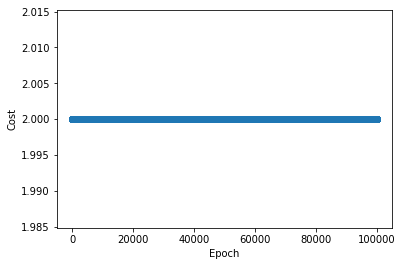

In [5]:
Jx = []
hiddenNodes = 8
numIterations = 100000

q3 = Network(0.001,2,hiddenNodes)
# changing weights to be greater than 5
q3.W1 = np.random.uniform(5,6,(2,hiddenNodes))
q3.W = np.random.uniform(5,6,(hiddenNodes,1))
q3.b1 = np.random.uniform(5,6,(1,hiddenNodes))
q3.b = np.random.uniform(5,6,(1,1))
print("New Weights")
print(q3.W1)
print(q3.W)
print(q3.b1)
print(q3.b)
i=0
# while less than max iterations and all training samples have an error greater than 0.4
while i < numIterations:
    error = q3.train(X, y)
    cost = np.sum(np.power(error,2),axis=0)
    Jx.append(cost)
    i += 1


plt.scatter([i for i,x in enumerate(Jx)], Jx)
plt.xlabel("Epoch")
plt.ylabel("Cost")

print("values from input to hidden")
print(q3.z1)
print("sigmoid 1")
print(q3.hidden)
print("values from hidden to output")
print(q3.z2)
print("sigmoid 2")
print(q3.output)
print("dW")
print(q3.dW)
print("dW1")
print(q3.dW1)